In [1]:
# Accuire 
from prepare import *

# DataFrame
import pandas as pd
import numpy as np

# Visualize your success!
import seaborn as sns
import matplotlib.pyplot as plt

#Stats
from scipy import stats

# sklearn for modeling:
from sklearn.tree import DecisionTreeClassifier,\
export_text, \
plot_tree
from sklearn.metrics import accuracy_score, \
classification_report, \
confusion_matrix
from sklearn.ensemble import RandomForestClassifier



In [2]:
df = prep_telco()

In [3]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,1,0,0,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,1,1,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,1,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,0,1,1,0,0,1,0,0,0,1


In [4]:
# Dropping customer id from DF to reduce the noise
df.drop(columns ='customer_id',inplace=True)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,0,1,0,1,0,0,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,1,0,0,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,1,1,0,0,1,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1,1,1,0,0,1,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,0,1,1,0,0,1,0,0,0,1


In [5]:
# Initial question..
# Does gender have an impact on churn
# Does partner or tenure have an impact on churn
# Does the monthy charge vrs the total_charge have an impact on churn
# Does having more services have an impact on churn

In [6]:
# Use train, validate, test function to split the data
train, validate, test =  train_validate_test(df, 'churn_Yes')

In [7]:
train.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'contract_type', 'internet_service_type', 'payment_type', 'gender_Male',
       'partner_Yes', 'dependents_Yes', 'phone_service_Yes',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'paperless_billing_Yes', 'churn_Yes', 'contract_type_One year',
       'contract_ty

In [8]:
# Getting all cat and num columns in different list
cat_cols, num_cols = [], []
for col in train.columns:
    if train[col].dtype == 'O':
        cat_cols.append(col)
    else:
        if train[col].nunique() < 10:
            cat_cols.append(col)
        else:
            num_cols.append(col)

In [9]:
cat_cols

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'gender_Male',
 'partner_Yes',
 'dependents_Yes',
 'phone_service_Yes',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'paperless_billing_Yes',
 'churn_Yes',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Credit card (a

In [10]:
num_cols

['tenure', 'monthly_charges', 'total_charges']

In [11]:
# Remove dummy columns from list
cat_cols = cat_cols[:-27]
cat_cols

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [12]:
# combine list for an explore list
explore_cols = cat_cols + num_cols 

Univariate assessment of feature gender:


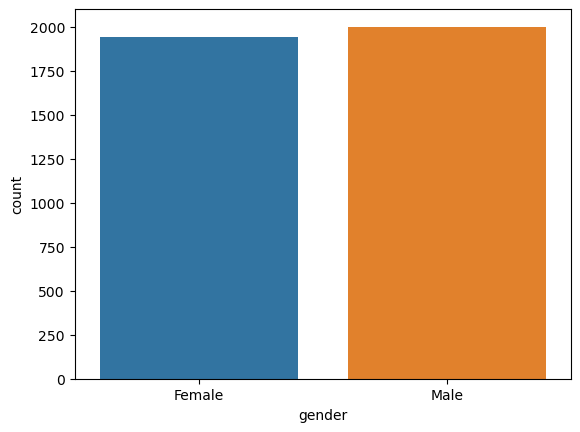

        gender    gender
Male      2002  0.507735
Female    1941  0.492265
------------------------------
------------------------------
Univariate assessment of feature senior_citizen:


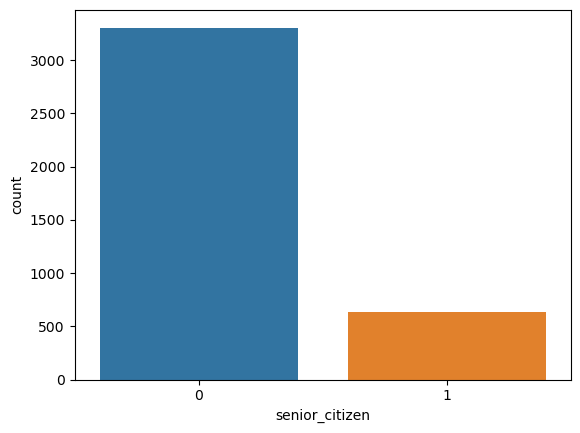

   senior_citizen  senior_citizen
0            3306        0.838448
1             637        0.161552
------------------------------
------------------------------
Univariate assessment of feature partner:


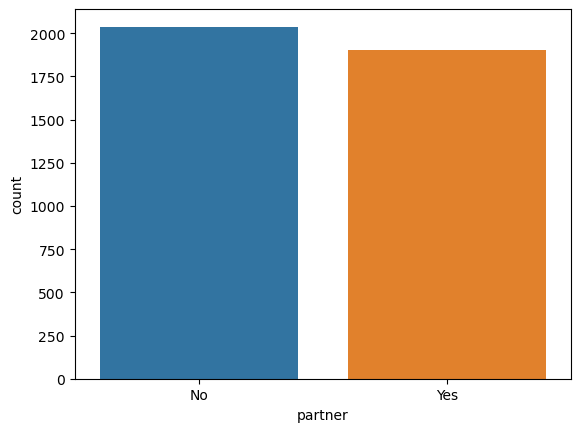

     partner   partner
No      2038  0.516865
Yes     1905  0.483135
------------------------------
------------------------------
Univariate assessment of feature dependents:


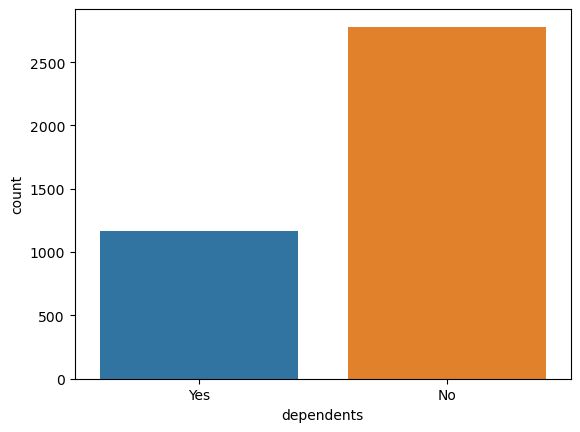

     dependents  dependents
No         2780    0.705047
Yes        1163    0.294953
------------------------------
------------------------------
Univariate assessment of feature phone_service:


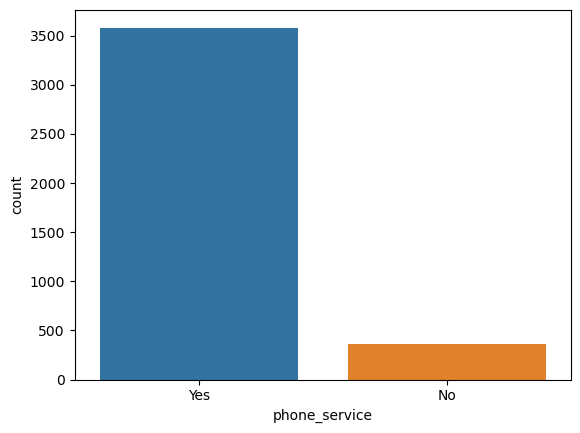

     phone_service  phone_service
Yes           3582       0.908445
No             361       0.091555
------------------------------
------------------------------
Univariate assessment of feature multiple_lines:


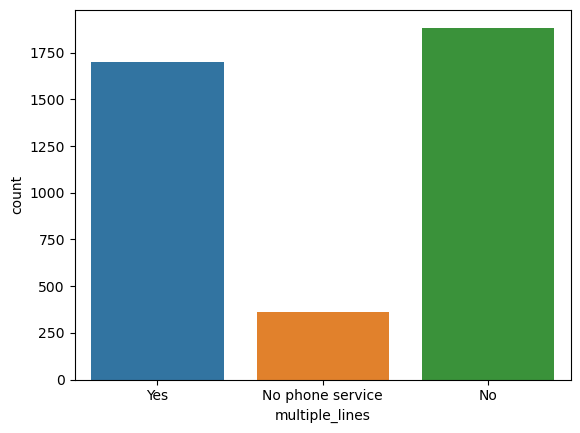

                  multiple_lines  multiple_lines
No                          1884        0.477809
Yes                         1698        0.430637
No phone service             361        0.091555
------------------------------
------------------------------
Univariate assessment of feature online_security:


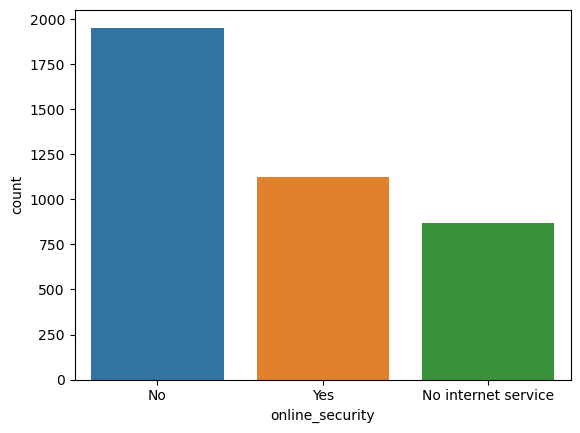

                     online_security  online_security
No                              1953         0.495308
Yes                             1124         0.285062
No internet service              866         0.219630
------------------------------
------------------------------
Univariate assessment of feature online_backup:


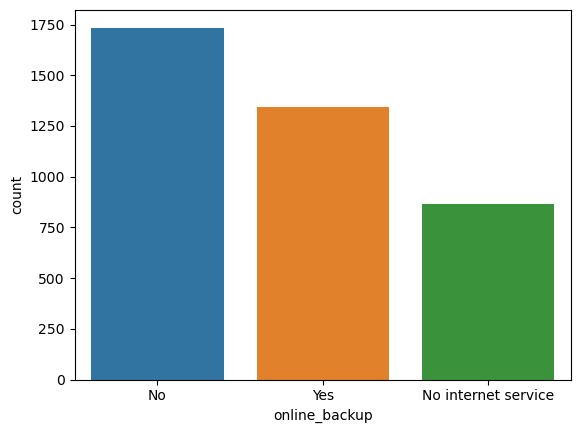

                     online_backup  online_backup
No                            1735        0.44002
Yes                           1342        0.34035
No internet service            866        0.21963
------------------------------
------------------------------
Univariate assessment of feature device_protection:


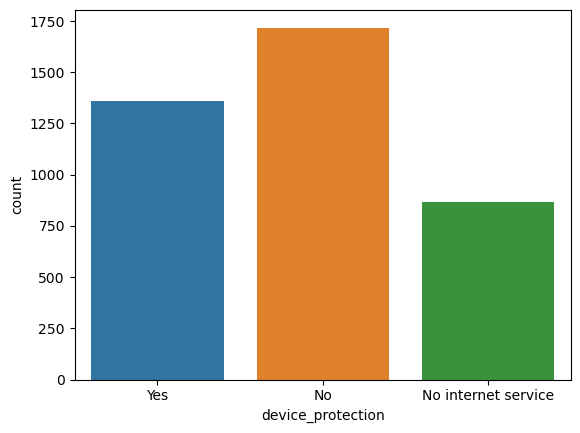

                     device_protection  device_protection
No                                1718           0.435709
Yes                               1359           0.344661
No internet service                866           0.219630
------------------------------
------------------------------
Univariate assessment of feature tech_support:


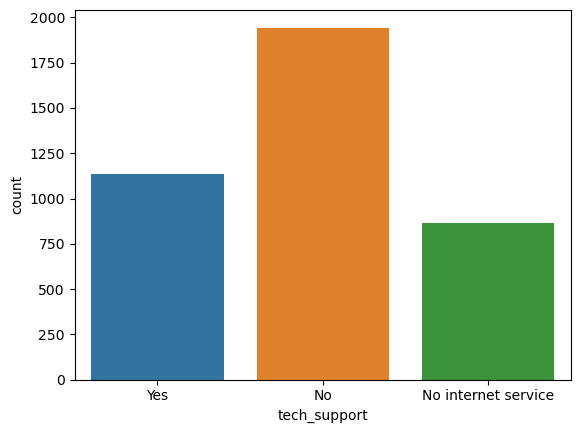

                     tech_support  tech_support
No                           1944      0.493026
Yes                          1133      0.287345
No internet service           866      0.219630
------------------------------
------------------------------
Univariate assessment of feature streaming_tv:


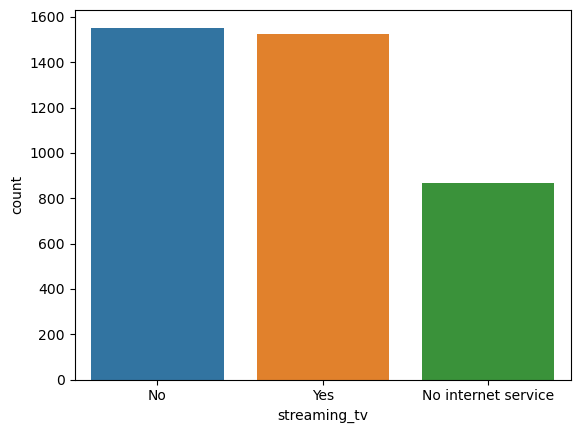

                     streaming_tv  streaming_tv
No                           1553      0.393863
Yes                          1524      0.386508
No internet service           866      0.219630
------------------------------
------------------------------
Univariate assessment of feature streaming_movies:


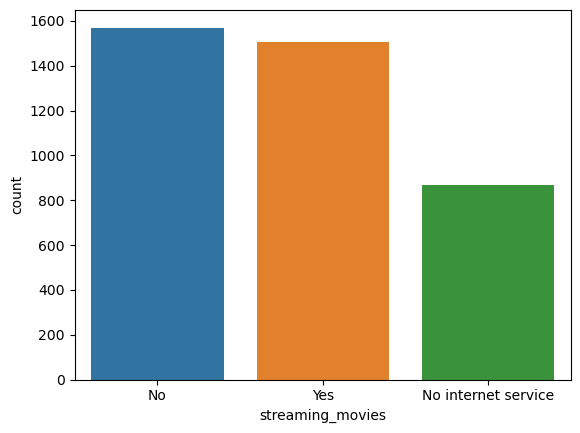

                     streaming_movies  streaming_movies
No                               1570          0.398174
Yes                              1507          0.382196
No internet service               866          0.219630
------------------------------
------------------------------
Univariate assessment of feature paperless_billing:


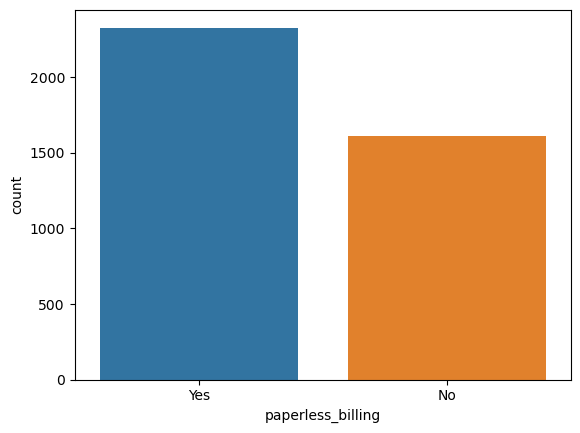

     paperless_billing  paperless_billing
Yes               2329           0.590667
No                1614           0.409333
------------------------------
------------------------------
Univariate assessment of feature churn:


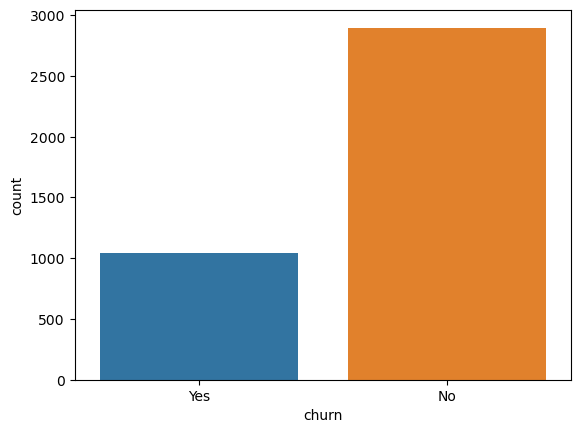

     churn    churn
No    2897  0.73472
Yes   1046  0.26528
------------------------------
------------------------------
Univariate assessment of feature contract_type:


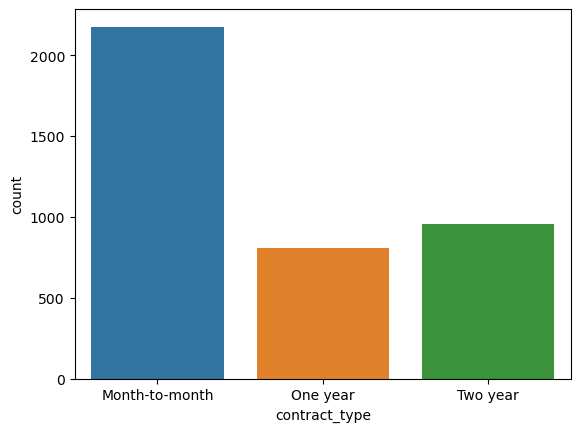

                contract_type  contract_type
Month-to-month           2176       0.551864
Two year                  959       0.243216
One year                  808       0.204920
------------------------------
------------------------------
Univariate assessment of feature internet_service_type:


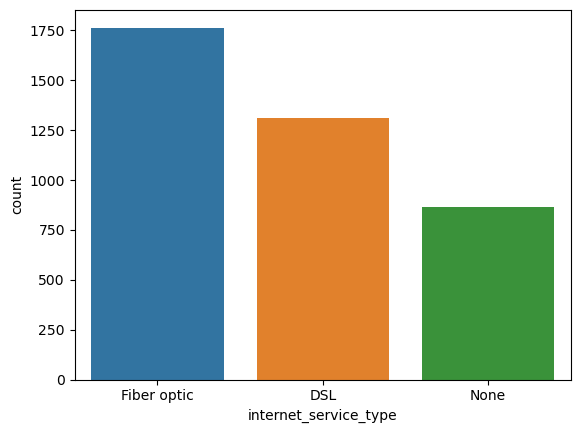

             internet_service_type  internet_service_type
Fiber optic                   1764               0.447375
DSL                           1313               0.332995
None                           866               0.219630
------------------------------
------------------------------
Univariate assessment of feature payment_type:


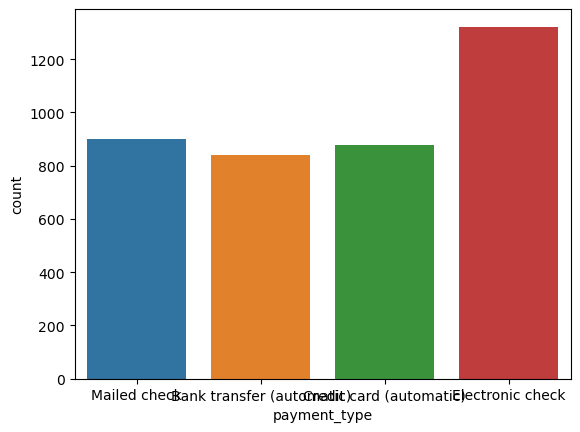

                           payment_type  payment_type
Electronic check                   1322      0.335278
Mailed check                        902      0.228760
Credit card (automatic)             879      0.222927
Bank transfer (automatic)           840      0.213036
------------------------------
------------------------------
Univariate Feature analysis of feature tenure:


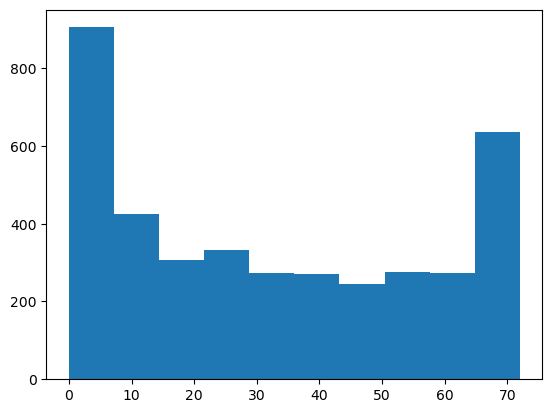

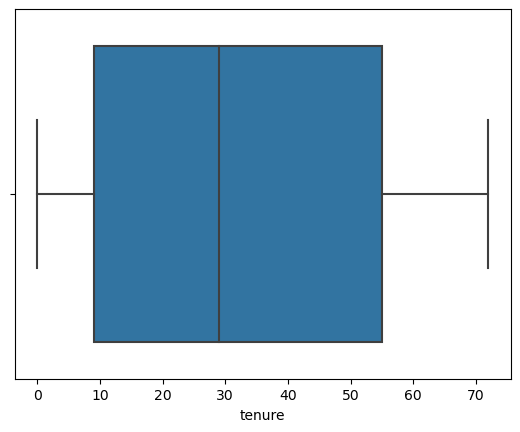

------------------------------
------------------------------
Univariate Feature analysis of feature monthly_charges:


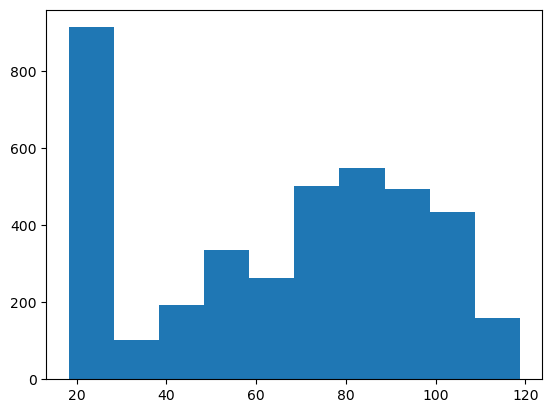

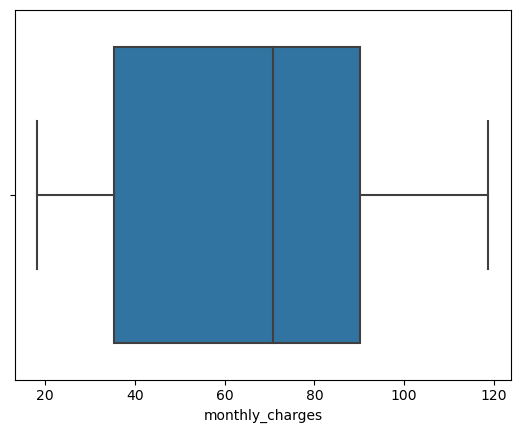

------------------------------
------------------------------
Univariate Feature analysis of feature total_charges:


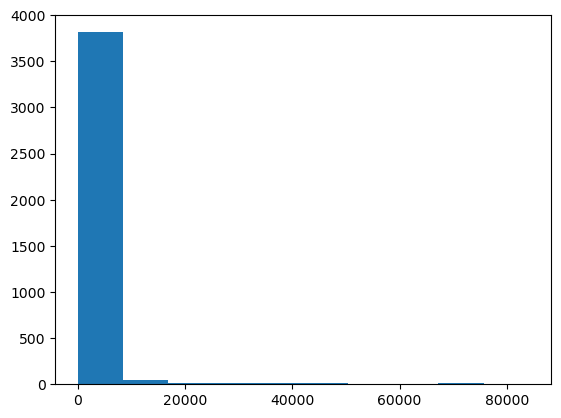

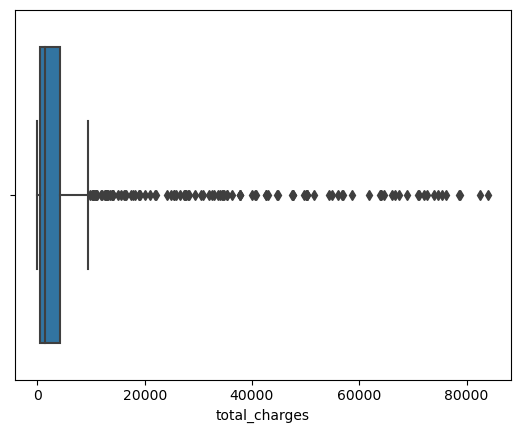

------------------------------
------------------------------


In [13]:
for col in explore_cols:
    if col in cat_cols:
        print(f'Univariate assessment of feature {col}:')
        sns.countplot(data=train, x=col)
        plt.show()
        print(
            pd.concat([train[col].value_counts(),
            train[col].value_counts(normalize=True)],
                 axis=1))
    else:
        print(f'Univariate Feature analysis of feature {col}:')
        plt.hist(train[col])
        plt.show()
        sns.boxplot(data=train, x=col)
        plt.show()
        train[col].describe()
    print('------------------------------')
    print('------------------------------')

In [14]:
# Take Aways for univariate explore
# More No Dependent that yes
# Way more with phone servise than not
# Good difference in month to month contract type then the other contract types
# Monthly charges does not have a normal distribution could relate to tenure

In [15]:
# bivariate and multivariate analysis:

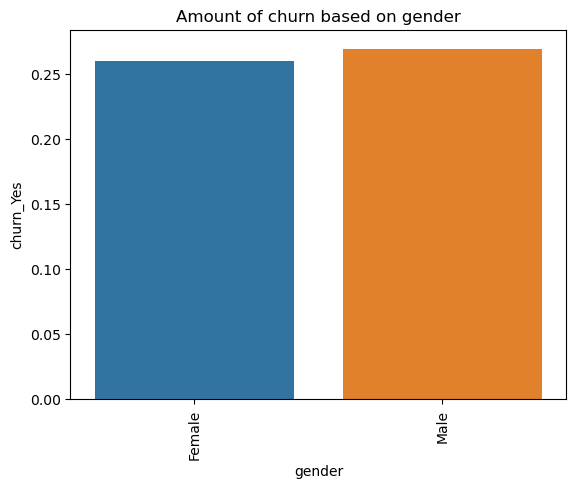

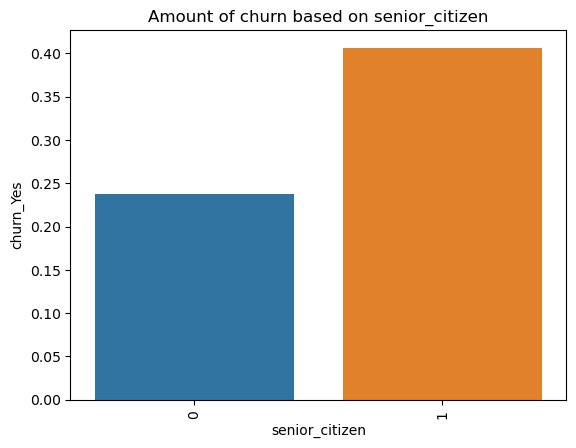

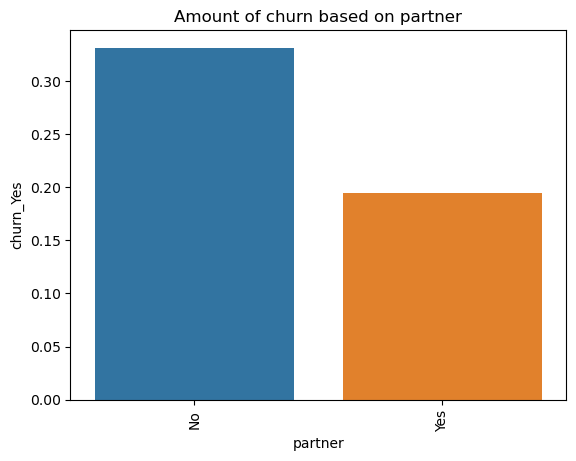

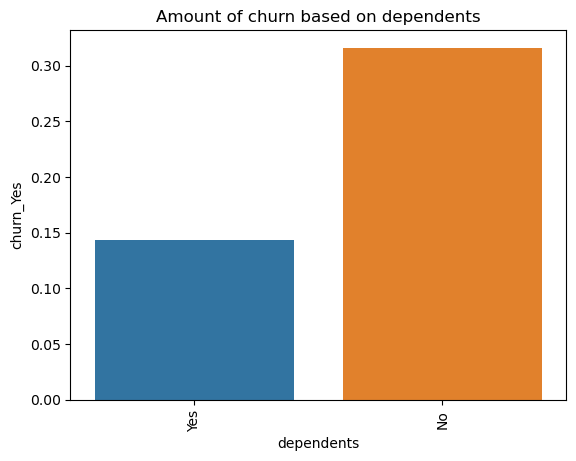

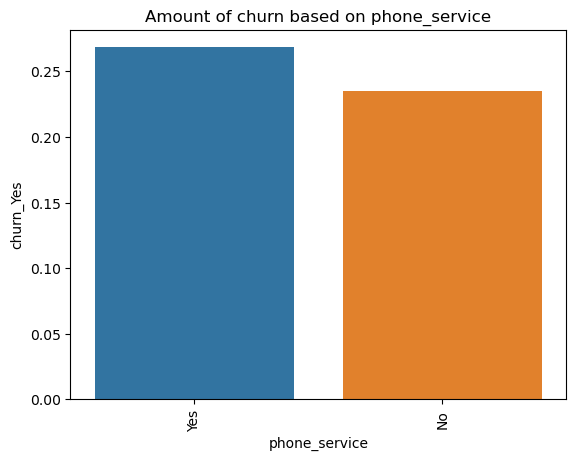

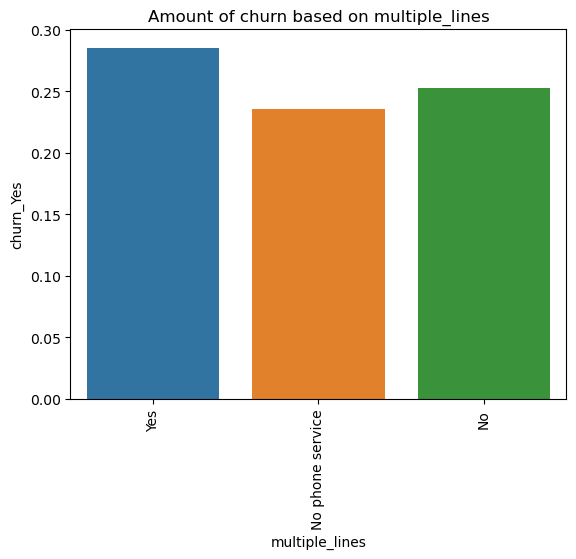

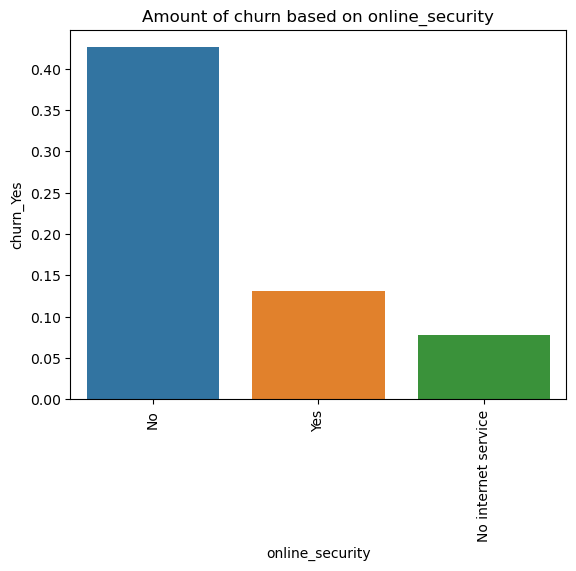

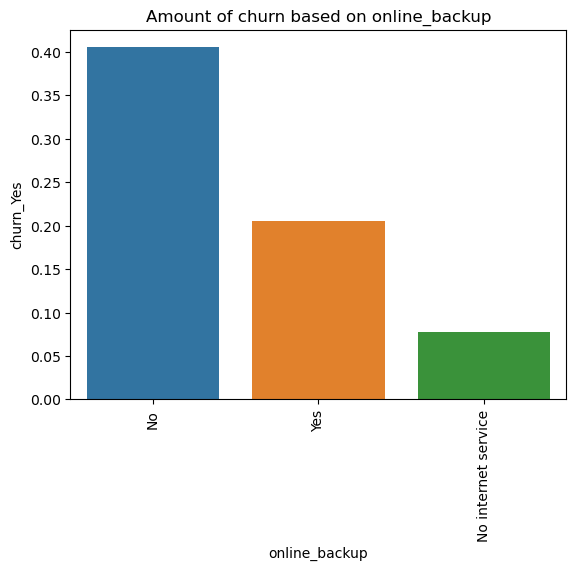

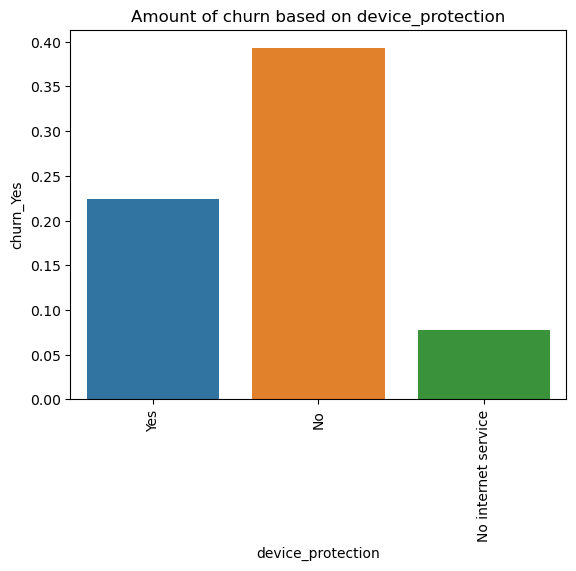

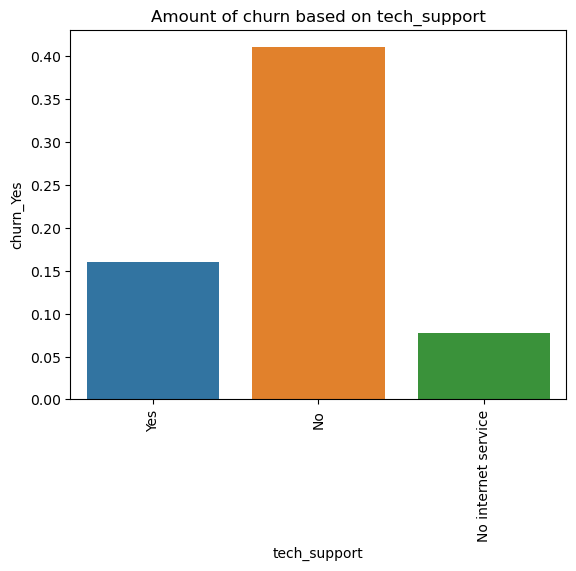

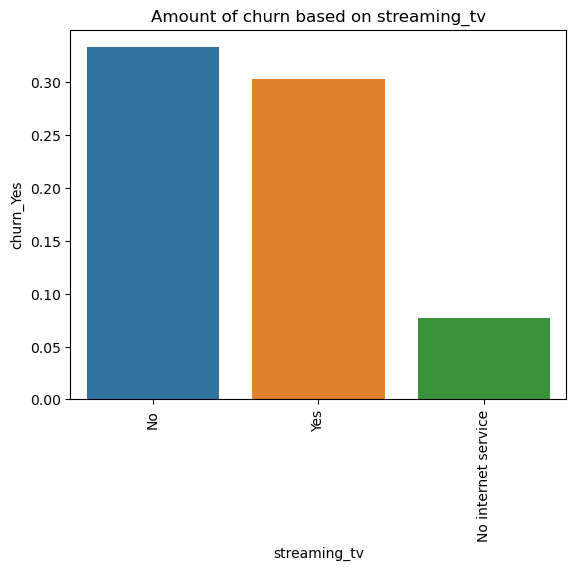

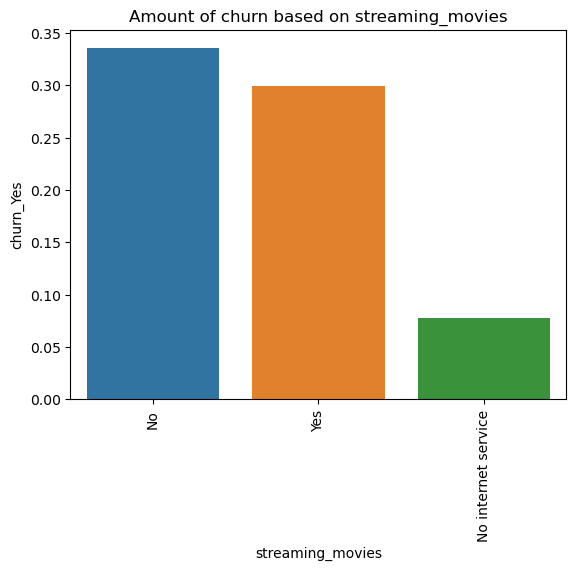

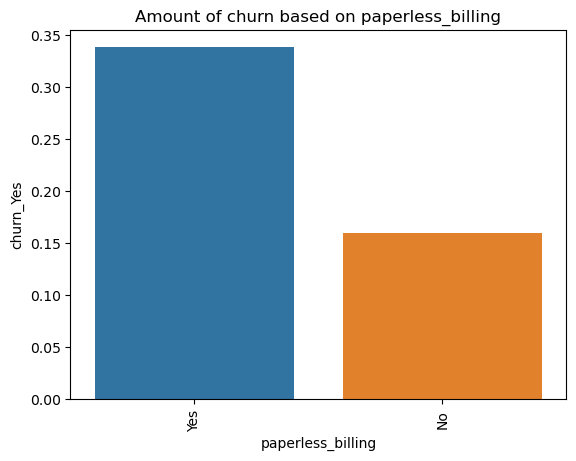

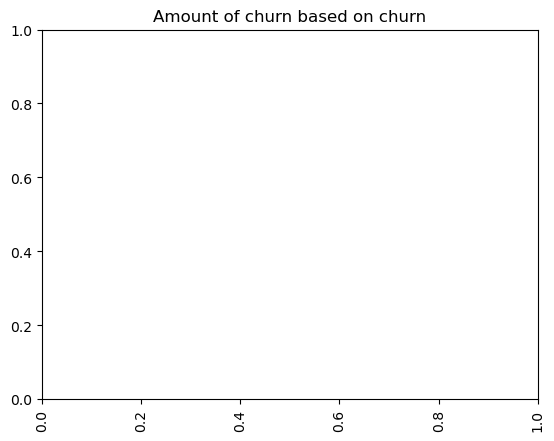

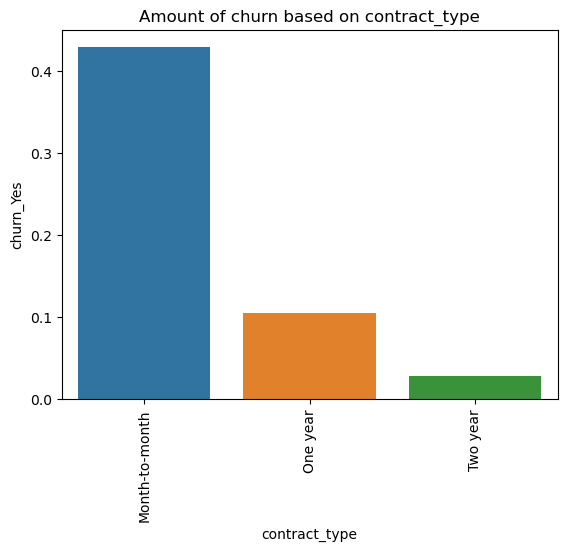

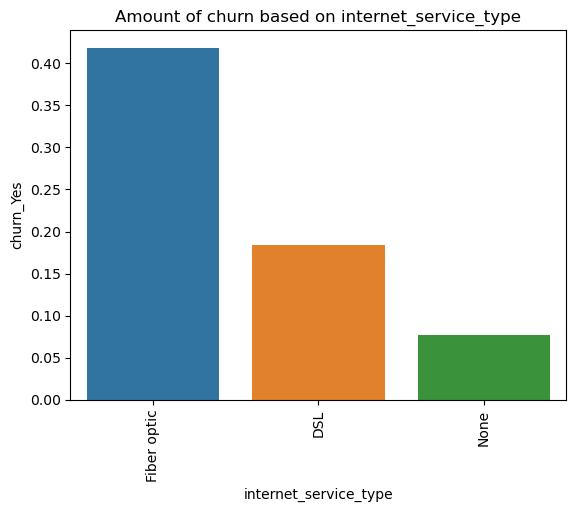

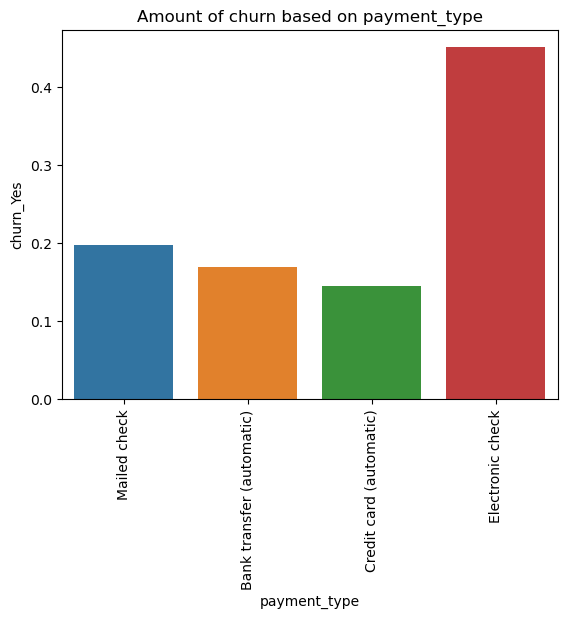

In [16]:
for col in cat_cols:
    if col != 'churn':
        sns.barplot(data=train,
                    x=col,
                    y=train['churn_Yes'],
                   ci=False)
    plt.xticks(rotation='vertical')
    plt.title(f'Amount of churn based on {col}')
    plt.show()

In [17]:
# Initial Take aways
# Churn heavly increased if customer does not have tech services (online_security, online backup, and tech_support) could be due to monthly cost and/or tenure
# Paperless billing also seems to have a big impact on churn 
# electronic check has a bigger impact on churn then the rest of the payment_types
# subscription type seems to play a big role in churn

In [18]:
# Begin stat tesing on drivers for churn

In [19]:
# Test payment type

In [20]:
# H0: payment type is not a driver for churn

# Ha: payment type is a driver for churn

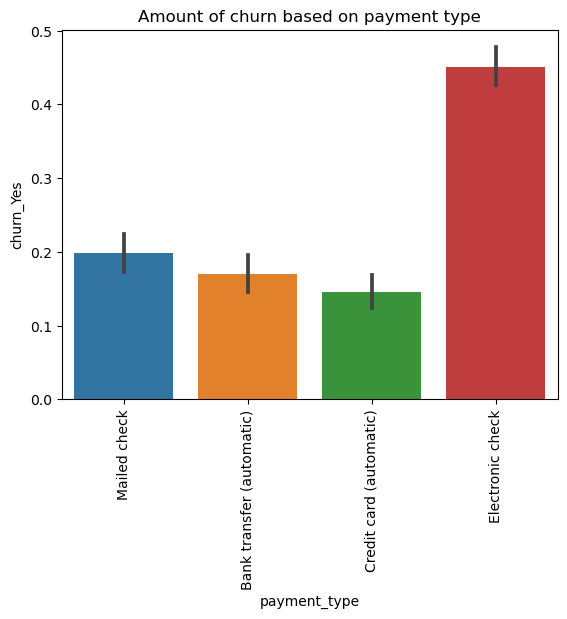

In [21]:
sns.barplot(data=df, x=train['payment_type'], y=train['churn_Yes'])
plt.xticks(rotation='vertical')
plt.title("Amount of churn based on payment type")
plt.show()

In [22]:
a = 0.05

In [23]:
observed = pd.crosstab(train['payment_type'], train['churn'])
observed

churn,No,Yes
payment_type,,
Bank transfer (automatic),697,143
Credit card (automatic),751,128
Electronic check,726,596
Mailed check,723,179


In [24]:
chi2, p, _, hypothetical = stats.chi2_contingency(observed)

In [25]:
if p < a:
    print(f'We can reject our null hypothesis: {p} < {a}')
else:
    print('We have failed to reject our null hypothesis')

We can reject our null hypothesis: 3.2066471934854266e-77 < 0.05


In [26]:
# test internet type

In [27]:
## H0: internet service type is not a driver for churn

# Ha: internet service type is a driver for churn

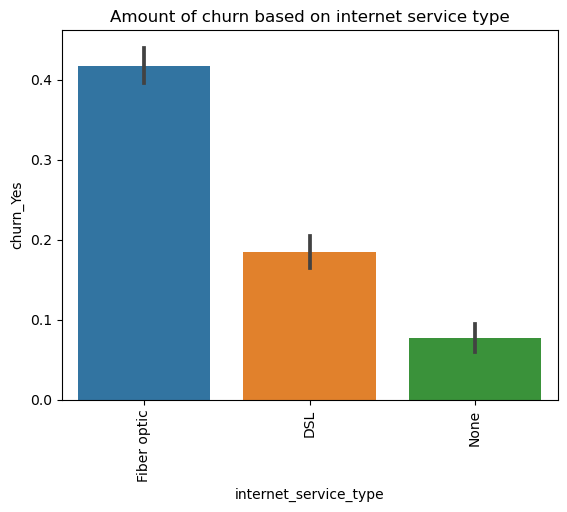

In [28]:
sns.barplot(data=df, x=train['internet_service_type'], y=train['churn_Yes'])
plt.xticks(rotation='vertical')
plt.title("Amount of churn based on internet service type")
plt.show()

In [30]:
observed = pd.crosstab(train['internet_service_type'], train['churn'])
observed

churn,No,Yes
internet_service_type,,
DSL,1071,242
Fiber optic,1027,737
None,799,67


In [31]:
chi2, p, _, hypothetical = stats.chi2_contingency(observed)

In [32]:
if p < a:
    print(f'We can reject our null hypothesis: and say that internet serverice type can be a driver because the value: {p} is less that alpha: {a}')
else:
    print('We have failed to reject our null hypothesis')

We can reject our null hypothesis: and say that internet serverice type can be a driver because the value: 4.20026357373882e-90 is less that alpha: 0.05


In [ ]:
## H0: internet contract type is not a driver for churn

# Ha: internet contract type is a driver for churn

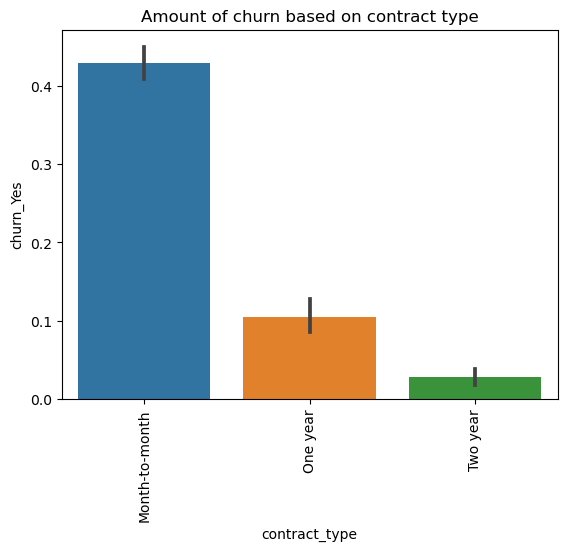

In [33]:
sns.barplot(data=df, x=train['contract_type'], y=train['churn_Yes'])
plt.xticks(rotation='vertical')
plt.title("Amount of churn based on contract type")
plt.show()

In [34]:
observed = pd.crosstab(train['contract_type'], train['churn'])
observed

churn,No,Yes
contract_type,,
Month-to-month,1242,934
One year,723,85
Two year,932,27


In [35]:
chi2, p, _, hypothetical = stats.chi2_contingency(observed)

In [36]:
if p < a:
    print(f'We can reject our null hypothesis: and say that contract type can be a driver because the value: {p} is less that alpha: {a}')
else:
    print('We have failed to reject our null hypothesis')

We can reject our null hypothesis: and say that contract type can be a driver because the value: 4.923817535766266e-149 is less that alpha: 0.05


In [ ]:
# H0: senior cizitzen satus has no affect on churn
# Ha: senior cizitzen satus does have an affect on churn

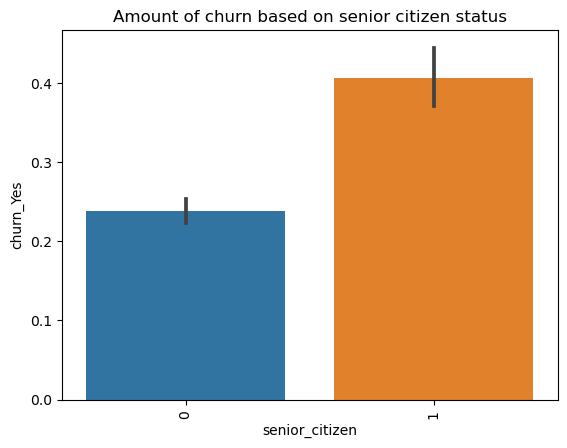

In [37]:
sns.barplot(data=df, x=train['senior_citizen'], y=train['churn_Yes'])
plt.xticks(rotation='vertical')
plt.title("Amount of churn based on senior citizen status")
plt.show()

In [38]:
observed = pd.crosstab(train['senior_citizen'], train['churn'])
observed

churn,No,Yes
senior_citizen,,
0,2519,787
1,378,259


In [39]:
chi2, p, _, hypothetical = stats.chi2_contingency(observed)

In [40]:
if p < a:
    print(f'We can reject our null hypothesis: and say that being a seniour citizen can be a driver because the value: {p} is less that alpha: {a}')
else:
    print('We have failed to reject our null hypothesis')

We can reject our null hypothesis: and say that being a seniour citizen can be a driver because the value: 1.7291506882452073e-18 is less that alpha: 0.05


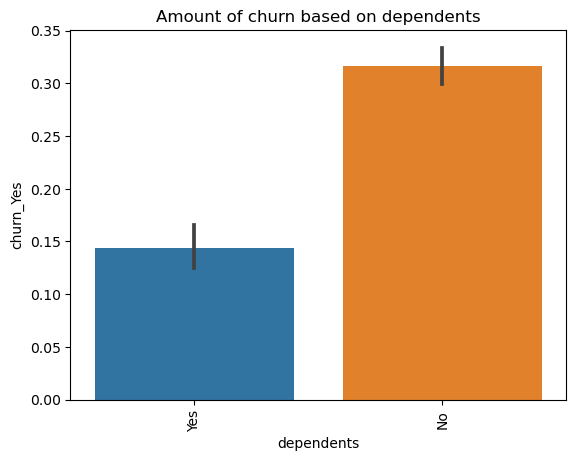

In [42]:
sns.barplot(data=df, x=train['dependents'], y=train['churn_Yes'])
plt.xticks(rotation='vertical')
plt.title("Amount of churn based on dependents")
plt.show()

In [43]:
observed = pd.crosstab(train['dependents'], train['churn'])
observed

churn,No,Yes
dependents,,
No,1901,879
Yes,996,167


In [44]:
if p < a:
    print(f'We can reject our null hypothesis: and say that being a seniour citizen can be a driver because the value: {p} is less that alpha: {a}')
else:
    print('We have failed to reject our null hypothesis')

We can reject our null hypothesis: and say that being a seniour citizen can be a driver because the value: 1.7291506882452073e-18 is less that alpha: 0.05


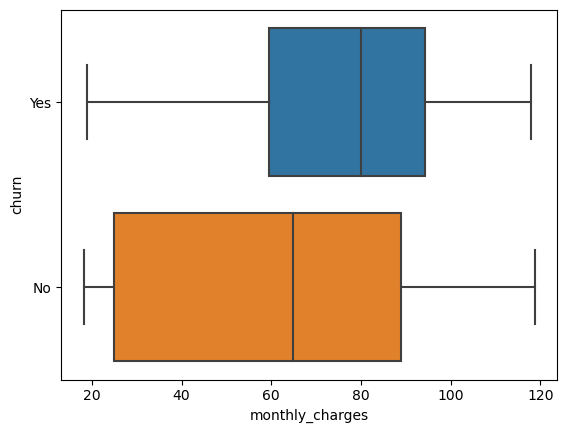

In [49]:
sns.boxplot(x=train.monthly_charges, y=train.churn)
plt.show()

In [64]:
churn = train[train.churn == 'Yes']
churn = churn.monthly_charges
noChurn = train[train.churn == "No"]
noChurn = noChurn.monthly_charges

In [65]:
t_stat, p_val = stats.ttest_ind(churn,
                                noChurn,
                                equal_var=True)

In [68]:
p_val < a

True

In [69]:
churn.describe()

count    1046.000000
mean       74.752533
std        24.579420
min        18.850000
25%        59.537500
50%        80.025000
75%        94.175000
max       117.800000
Name: monthly_charges, dtype: float64